In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [3]:
y   = load('../../March2021/Observation_models/ObsY.joblib') 
CNN = load('../../March2021/Observation_models/CNNY.joblib') 
LR  = load('../../March2021/Observation_models/LRY.joblib') 
ACCESS_CM2_CNN = load('ACCESS-CM2-CNN-Y.joblib')
ACCESS_CM2_LR = load('ACCESS-CM2-LR-Y.joblib')
CanESM5_CNN = load('CanESM5-CNN-Y.joblib')
CanESM5_LR = load('CanESM5-LR-Y.joblib')
IITMESM_CNN = load('IITM-ESM-CNN-Y.joblib')
IITMESM_LR = load('IITM-ESM-LR-Y.joblib')
GFDL_CM4_CNN = load('GFDL-CM4-CNN-Y.joblib')
GFDL_CM4_LR = load('GFDL-CM4-LR-Y.joblib')
LMDZ_CNN = load('LMDZ-CNN-Y.joblib')
LMDZ_LR = load('LMDZ-LR-Y.joblib')
INM_CM5_0_CNN = load('INM-CM5-0-CNN-Y.joblib')
INM_CM5_0_LR = load('INM-CM5-0-LR-Y.joblib')

In [4]:
def getFogcats( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    nf=list()
    medf=list()
    wdf=list()
    for yr in range(1981,2015,1):
        dStart=datetime.datetime(yr-1, 12, 1)
        dEnd=datetime.datetime(yr, 1, 31)
        yAct = dArray.sel(time=slice(dStart,dEnd))
        nf.append(yAct[yAct<0.040].shape[0])
        medf.append(yAct[(yAct<=0.46) & (yAct>=0.04)].shape[0])
        wdf.append(yAct[yAct>0.46].shape[0])
    
    return nf,medf,wdf

In [5]:
nO,medO,wdO=getFogcats(y)
nLR,medLR,wdLR=getFogcats(LR)
nCNN,medCNN,wdCNN=getFogcats(CNN)
nACCESS_CM2_CNN,medACCESS_CM2_CNN,wdACCESS_CM2_CNN=getFogcats(ACCESS_CM2_CNN)
nACCESS_CM2_LR,medACCESS_CM2_LR,wdACCESS_CM2_LR=getFogcats(ACCESS_CM2_LR)
nCanESM5_CNN,medCanESM5_CNN,wdCanESM5_CNN=getFogcats(CanESM5_CNN)
nCanESM5_LR,medCanESM5_LR,wdCanESM5_LR=getFogcats(CanESM5_LR)
nIITMESM_CNN,medIITMESM_CNN,wdIITMESM_CNN=getFogcats(IITMESM_CNN)
nIITMESM_LR,medIITMESM_LR,wdIITMESM_LR=getFogcats(IITMESM_LR)
nGFDL_CM4_CNN,medGFDL_CM4_CNN,wdGFDL_CM4_CNN=getFogcats(GFDL_CM4_CNN)
nGFDL_CM4_LR,medGFDL_CM4_LR,wdGFDL_CM4_LR=getFogcats(GFDL_CM4_LR)
nLMDZ_CNN,medLMDZ_CNN,wdLMDZ_CNN=getFogcats(LMDZ_CNN)
nLMDZ_LR,medLMDZ_LR,wdLMDZ_LR=getFogcats(LMDZ_LR)
nINM_CM5_0_CNN,medINM_CM5_0_CNN,wdINM_CM5_0_CNN=getFogcats(INM_CM5_0_CNN)
nINM_CM5_0_LR,medINM_CM5_0_LR,wdINM_CM5_0_LR=getFogcats(INM_CM5_0_LR)

In [6]:
print(st.mean(nO),st.mean(medO),st.mean(wdO),st.stdev(nO),st.stdev(medO),st.stdev(wdO))
print(st.mean(nLR),st.mean(medLR),st.mean(wdLR),st.stdev(nLR),st.stdev(medLR),st.stdev(wdLR))
print(st.mean(nCNN),st.mean(medCNN),st.mean(wdCNN),st.stdev(nCNN),st.stdev(medCNN),st.stdev(wdCNN))
print(st.mean(nACCESS_CM2_LR),st.mean(medACCESS_CM2_LR),st.mean(wdACCESS_CM2_LR),st.stdev(nACCESS_CM2_LR),st.stdev(medACCESS_CM2_LR),st.stdev(wdACCESS_CM2_LR))
print(st.mean(nACCESS_CM2_CNN),st.mean(medACCESS_CM2_CNN),st.mean(wdACCESS_CM2_CNN),st.stdev(nACCESS_CM2_CNN),st.stdev(medACCESS_CM2_CNN),st.stdev(wdACCESS_CM2_CNN))
print(st.mean(nCanESM5_LR),st.mean(medCanESM5_LR),st.mean(wdCanESM5_LR),st.stdev(nCanESM5_LR),st.stdev(medCanESM5_LR),st.stdev(wdCanESM5_LR))
print(st.mean(nCanESM5_CNN),st.mean(medCanESM5_CNN),st.mean(wdCanESM5_CNN),st.stdev(nCanESM5_CNN),st.stdev(medCanESM5_CNN),st.stdev(wdCanESM5_CNN))
print(st.mean(nIITMESM_LR),st.mean(medIITMESM_LR),st.mean(wdIITMESM_LR),st.stdev(nIITMESM_LR),st.stdev(medIITMESM_LR),st.stdev(wdIITMESM_LR))
print(st.mean(nIITMESM_CNN),st.mean(medIITMESM_CNN),st.mean(wdIITMESM_CNN),st.stdev(nIITMESM_CNN),st.stdev(medIITMESM_CNN),st.stdev(wdIITMESM_CNN))
print(st.mean(nGFDL_CM4_LR),st.mean(medGFDL_CM4_LR),st.mean(wdGFDL_CM4_LR),st.stdev(nGFDL_CM4_LR),st.stdev(medGFDL_CM4_LR),st.stdev(wdGFDL_CM4_LR))
print(st.mean(nGFDL_CM4_CNN),st.mean(medGFDL_CM4_CNN),st.mean(wdGFDL_CM4_CNN),st.stdev(nGFDL_CM4_CNN),st.stdev(medGFDL_CM4_CNN),st.stdev(wdGFDL_CM4_CNN))
print(st.mean(nLMDZ_LR),st.mean(medLMDZ_LR),st.mean(wdLMDZ_LR),st.stdev(nLMDZ_LR),st.stdev(medLMDZ_LR),st.stdev(wdLMDZ_LR))
print(st.mean(nLMDZ_CNN),st.mean(medLMDZ_CNN),st.mean(wdLMDZ_CNN),st.stdev(nLMDZ_CNN),st.stdev(medLMDZ_CNN),st.stdev(wdLMDZ_CNN))
print(st.mean(nINM_CM5_0_LR),st.mean(medINM_CM5_0_LR),st.mean(wdINM_CM5_0_LR),st.stdev(nINM_CM5_0_LR),st.stdev(medINM_CM5_0_LR),st.stdev(wdINM_CM5_0_LR))
print(st.mean(nINM_CM5_0_CNN),st.mean(medINM_CM5_0_CNN),st.mean(wdINM_CM5_0_CNN),st.stdev(nINM_CM5_0_CNN),st.stdev(medINM_CM5_0_CNN),st.stdev(wdINM_CM5_0_CNN))

3.411764705882353 45.088235294117645 13.5 3.9244196410063714 9.33019746148128 11.098047876390995
2.235294117647059 51.470588235294116 8.294117647058824 2.4870430724470323 9.172539036208377 9.968220447744455
2.264705882352941 47.470588235294116 12.264705882352942 3.222165877352758 11.631293458695023 12.759568776624816
60.970588235294116 0.029411764705882353 0 0.17149858514250885 0.17149858514250885 0.0
0.17647058823529413 51.55882352941177 9.264705882352942 0.4586269518104188 9.182299099669605 9.079810515742194
61 0 0 0.0 0.0 0.0
0.47058823529411764 52.61764705882353 7.911764705882353 0.8956221510397981 6.7150428410030445 6.999427020094264
61 0 0 0.0 0.0 0.0
0.8529411764705882 51.26470588235294 8.882352941176471 1.986810340663716 6.383258517780149 6.700360487282498
61 0 0 0.0 0.0 0.0
1.3823529411764706 47.23529411764706 12.382352941176471 2.7854024885414503 9.3486632443536 10.345588156112738
0 0 45.76470588235294 0.0 0.0 26.271379545889985
0.08823529411764706 41.294117647058826 4.382352

In [7]:
#nACCESS_CM2_LR,medACCESS_CM2_LR,wdACCESS_CM2_LR=getFogcats(ACCESS_CM2_LR)

Text(0.5, 1.0, 'Widespread Fog Days (>11)')

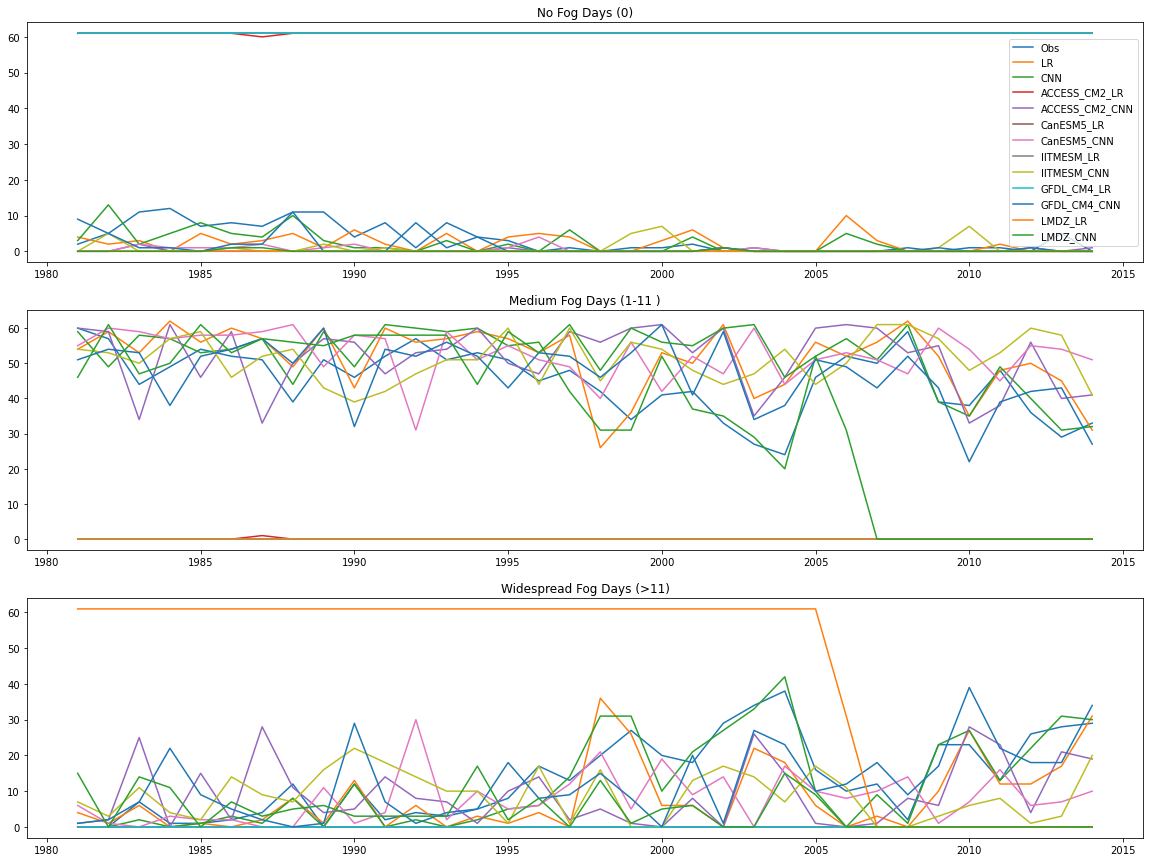

In [20]:
fig=plt.figure(figsize=[20,15])
X=np.arange(1981,2015)
ax = fig.add_subplot(311)
ax.plot(X,nO,label='Obs')
ax.plot(X,nLR,label='LR')
ax.plot(X,nCNN,label='CNN')
ax.plot(X,nACCESS_CM2_LR,label='ACCESS_CM2_LR')
ax.plot(X,nACCESS_CM2_CNN,label='ACCESS_CM2_CNN')
ax.plot(X,nCanESM5_LR,label='CanESM5_LR')
ax.plot(X,nCanESM5_CNN,label='CanESM5_CNN')
ax.plot(X,nIITMESM_LR,label='IITMESM_LR')
ax.plot(X,nIITMESM_CNN,label='IITMESM_CNN')
ax.plot(X,nGFDL_CM4_LR,label='GFDL_CM4_LR')
ax.plot(X,nGFDL_CM4_CNN,label='GFDL_CM4_CNN')
ax.plot(X,nLMDZ_LR,label='LMDZ_LR')
ax.plot(X,nLMDZ_CNN,label='LMDZ_CNN')
ax.legend()
ax.set_title('No Fog Days (0)')

ax1 = fig.add_subplot(312)
ax1.plot(X,medO)
ax1.plot(X,medLR)
ax1.plot(X,medCNN)
ax1.plot(X,medACCESS_CM2_LR)
ax1.plot(X,medACCESS_CM2_CNN)
ax1.plot(X,medCanESM5_LR)
ax1.plot(X,medCanESM5_CNN)
ax1.plot(X,medIITMESM_LR)
ax1.plot(X,medIITMESM_CNN)
ax1.plot(X,medGFDL_CM4_LR)
ax1.plot(X,medGFDL_CM4_CNN)
ax1.plot(X,medLMDZ_LR)
ax1.plot(X,medLMDZ_CNN)
#ax1.legend()
ax1.set_title('Medium Fog Days (1-11 )')

ax2 = fig.add_subplot(313)
ax2.plot(X,wdO)
ax2.plot(X,wdLR)
ax2.plot(X,wdCNN)
ax2.plot(X,wdACCESS_CM2_LR)
ax2.plot(X,wdACCESS_CM2_CNN)
ax2.plot(X,wdCanESM5_LR)
ax2.plot(X,wdCanESM5_CNN)
ax2.plot(X,wdIITMESM_LR)
ax2.plot(X,wdIITMESM_CNN)
ax2.plot(X,wdGFDL_CM4_LR)
ax2.plot(X,wdGFDL_CM4_CNN)
ax2.plot(X,wdLMDZ_LR)
ax2.plot(X,wdLMDZ_CNN)
#ax2.legend()
ax2.set_title('Widespread Fog Days (>11)' )

#plt.savefig('Obs_TS.png')

Text(0.5, 1.0, 'Widespread Fog Days (>11)')

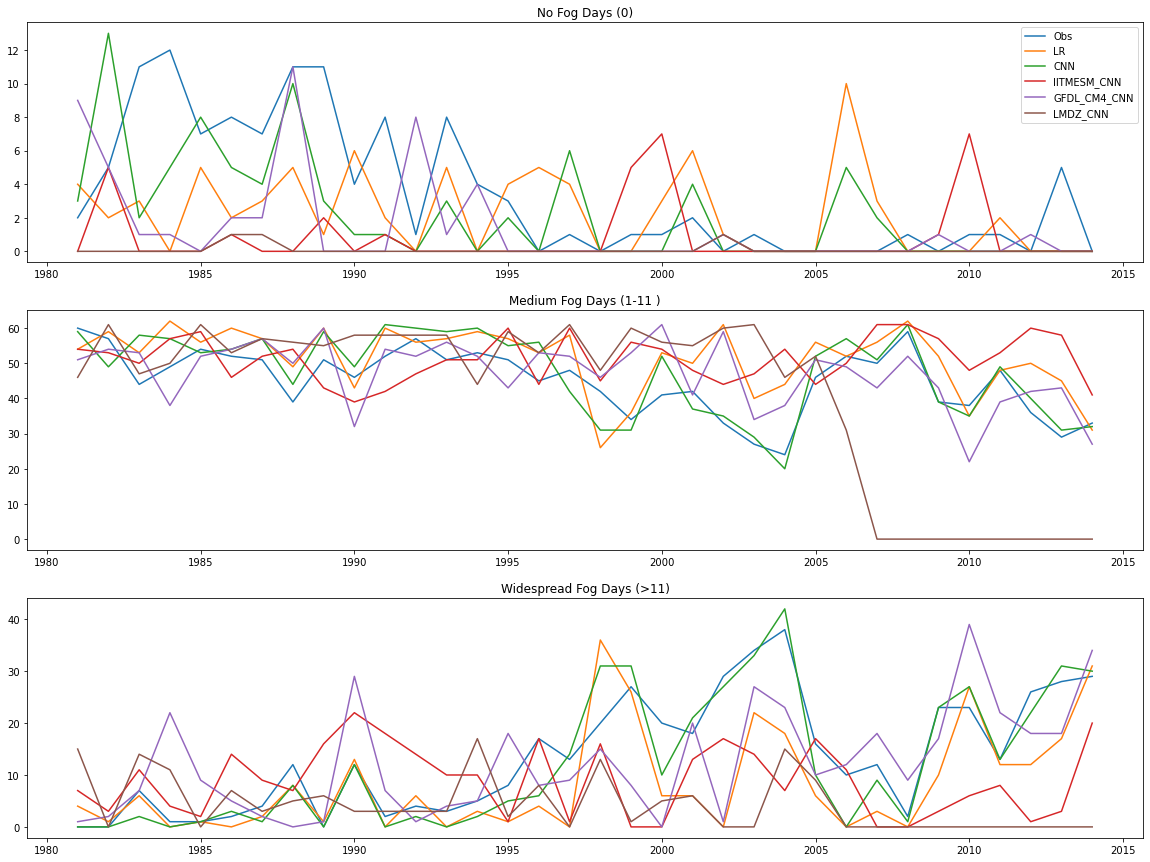

In [22]:
fig=plt.figure(figsize=[20,15])
X=np.arange(1981,2015)
ax = fig.add_subplot(311)
ax.plot(X,nO,label='Obs')
ax.plot(X,nLR,label='LR')
ax.plot(X,nCNN,label='CNN')
#ax.plot(X,nIITMESM_LR,label='IITMESM_LR')
ax.plot(X,nIITMESM_CNN,label='IITMESM_CNN')
#ax.plot(X,nGFDL_CM4_LR,label='GFDL_CM4_LR')
ax.plot(X,nGFDL_CM4_CNN,label='GFDL_CM4_CNN')
#ax.plot(X,nLMDZ_LR,label='LMDZ_LR')
ax.plot(X,nLMDZ_CNN,label='LMDZ_CNN')
ax.legend()
ax.set_title('No Fog Days (0)')

ax1 = fig.add_subplot(312)
ax1.plot(X,medO)
ax1.plot(X,medLR)
ax1.plot(X,medCNN)
#ax1.plot(X,medIITMESM_LR)
ax1.plot(X,medIITMESM_CNN)
#ax1.plot(X,medGFDL_CM4_LR)
ax1.plot(X,medGFDL_CM4_CNN)
#ax1.plot(X,medLMDZ_LR)
ax1.plot(X,medLMDZ_CNN)
#ax1.legend()
ax1.set_title('Medium Fog Days (1-11 )')

ax2 = fig.add_subplot(313)
ax2.plot(X,wdO)
ax2.plot(X,wdLR)
ax2.plot(X,wdCNN)
#ax2.plot(X,wdIITMESM_LR)
ax2.plot(X,wdIITMESM_CNN)
#ax2.plot(X,wdGFDL_CM4_LR)
ax2.plot(X,wdGFDL_CM4_CNN)
#ax2.plot(X,wdLMDZ_LR)
ax2.plot(X,wdLMDZ_CNN)
#ax2.legend()
ax2.set_title('Widespread Fog Days (>11)' )

#plt.savefig('Obs_TS.png')

In [9]:
nO[0]+medO[0]+wdO[0]

62

In [10]:
nO[1]+medO[1]+wdO[1]

62

Text(0.5, 1.0, 'INM_CM5_0_CNN')

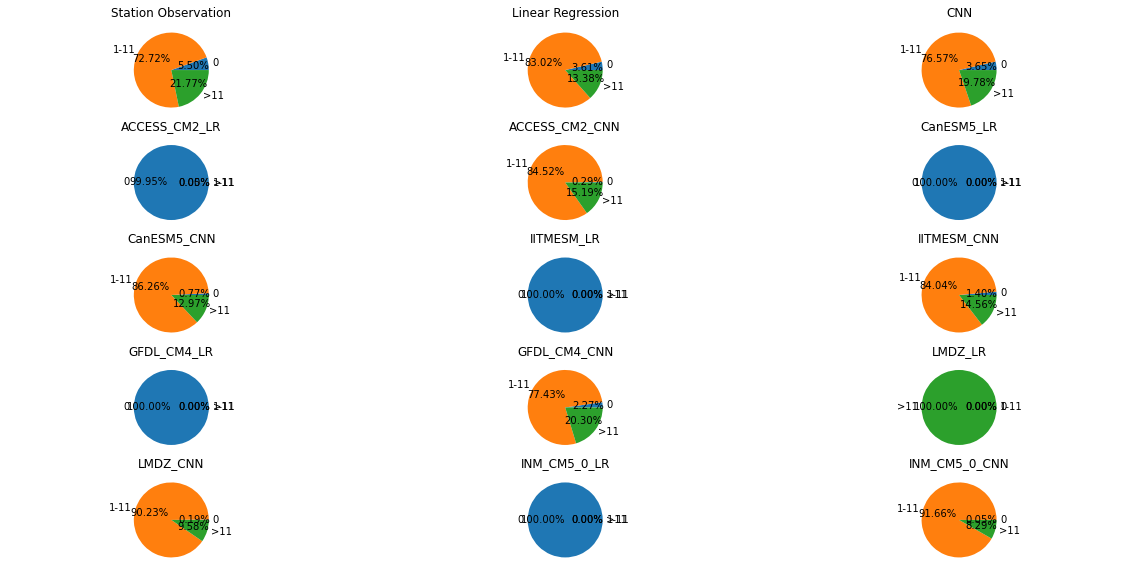

In [7]:
fig = plt.figure(figsize=(20,10))
pieLabs = ['0', '1-11', '>11']
ax = fig.add_subplot(533)
ax.axis('equal')
ax.pie([st.mean(nCNN),st.mean(medCNN),st.mean(wdCNN)], labels = pieLabs,autopct='%1.2f%%')
ax.set_title('CNN')

ax1 = fig.add_subplot(534)
ax1.axis('equal')
ax1.pie([st.mean(nACCESS_CM2_LR),st.mean(medACCESS_CM2_LR),st.mean(wdACCESS_CM2_LR)], labels = pieLabs,autopct='%1.2f%%')
ax1.set_title('ACCESS_CM2_LR')

ax2 = fig.add_subplot(531)
ax2.axis('equal')
#pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
ax2.pie([st.mean(nO),st.mean(medO),st.mean(wdO)], labels = pieLabs,autopct='%1.2f%%')
ax2.set_title('Station Observation')


ax3 = fig.add_subplot(532)
ax3.axis('equal')
#pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
ax3.pie([st.mean(nLR),st.mean(medLR),st.mean(wdLR)], labels = pieLabs,autopct='%1.2f%%')
ax3.set_title('Linear Regression')
#plt.savefig('Obs_pie.png')

ax4 = fig.add_subplot(535)
ax4.axis('equal')
ax4.pie([st.mean(nACCESS_CM2_CNN),st.mean(medACCESS_CM2_CNN),st.mean(wdACCESS_CM2_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax4.set_title('ACCESS_CM2_CNN')

ax5 = fig.add_subplot(536)
ax5.axis('equal')
ax5.pie([st.mean(nCanESM5_LR),st.mean(medCanESM5_LR),st.mean(wdCanESM5_LR)], labels = pieLabs,autopct='%1.2f%%')
ax5.set_title('CanESM5_LR')


ax6 = fig.add_subplot(537)
ax6.axis('equal')
ax6.pie([st.mean(nCanESM5_CNN),st.mean(medCanESM5_CNN),st.mean(wdCanESM5_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax6.set_title('CanESM5_CNN')

ax7 = fig.add_subplot(538)
ax7.axis('equal')
ax7.pie([st.mean(nIITMESM_LR),st.mean(medIITMESM_LR),st.mean(wdIITMESM_LR)], labels = pieLabs,autopct='%1.2f%%')
ax7.set_title('IITMESM_LR')


ax8 = fig.add_subplot(539)
ax8.axis('equal')
ax8.pie([st.mean(nIITMESM_CNN),st.mean(medIITMESM_CNN),st.mean(wdIITMESM_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax8.set_title('IITMESM_CNN')

ax9 = fig.add_subplot(5,3,10)
ax9.axis('equal')
ax9.pie([st.mean(nGFDL_CM4_LR),st.mean(medGFDL_CM4_LR),st.mean(wdGFDL_CM4_LR)], labels = pieLabs,autopct='%1.2f%%')
ax9.set_title('GFDL_CM4_LR')


ax10 = fig.add_subplot(5,3,11)
ax10.axis('equal')
ax10.pie([st.mean(nGFDL_CM4_CNN),st.mean(medGFDL_CM4_CNN),st.mean(wdGFDL_CM4_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax10.set_title('GFDL_CM4_CNN')

ax11 = fig.add_subplot(5,3,12)
ax11.axis('equal')
ax11.pie([st.mean(nLMDZ_LR),st.mean(medLMDZ_LR),st.mean(wdLMDZ_LR)], labels = pieLabs,autopct='%1.2f%%')
ax11.set_title('LMDZ_LR')


ax12 = fig.add_subplot(5,3,13)
ax12.axis('equal')
ax12.pie([st.mean(nLMDZ_CNN),st.mean(medLMDZ_CNN),st.mean(wdLMDZ_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax12.set_title('LMDZ_CNN')

ax13 = fig.add_subplot(5,3,14)
ax13.axis('equal')
ax13.pie([st.mean(nINM_CM5_0_LR),st.mean(medINM_CM5_0_LR),st.mean(wdINM_CM5_0_LR)], labels = pieLabs,autopct='%1.2f%%')
ax13.set_title('INM_CM5_0_LR')


ax14 = fig.add_subplot(5,3,15)
ax14.axis('equal')
ax14.pie([st.mean(nINM_CM5_0_CNN),st.mean(medINM_CM5_0_CNN),st.mean(wdINM_CM5_0_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax14.set_title('INM_CM5_0_CNN')